2. 1일차, 2일차에 했던 Kaggle 분류/회귀 데이터셋을 SGD를 사용해서 재학습해 보고, 최적의 에포크 탐색하는 코드를 작성해 봅시다.  

In [16]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# 1일차 heart_data
heart = pd.read_csv("C:\\Users\\user\\Desktop\\빅데이터 8기 김영규\\ML_DL\\ML_week1\\Day1\\heart.csv")
heart.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
heart_input = heart[['chol','thalachh','age','trtbps', 'oldpeak']].to_numpy()
heart_target = heart['output'].to_numpy()

In [19]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    heart_input, heart_target, random_state=42)

In [20]:
#다중로지스틱 분류
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_input, train_target)

print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7268722466960352
0.7763157894736842


In [21]:
# 과소적합으로 판단해 poly를 사용합니다.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

In [22]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.7400881057268722
0.7894736842105263


c:\ProgramData\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [23]:
# 정규화
from sklearn.preprocessing import StandardScaler

ss= StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [24]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.762114537444934
0.7631578947368421


In [25]:
# 과소적합이 해소되지 않아 추가적으로 경사하강법을 진행.
# 분류모델이기 때문에 log_loss를 사용
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6607929515418502
0.7105263157894737


c:\ProgramData\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [26]:
# 추가적인 학습을 진행합니다.
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.6079295154185022
0.5526315789473685


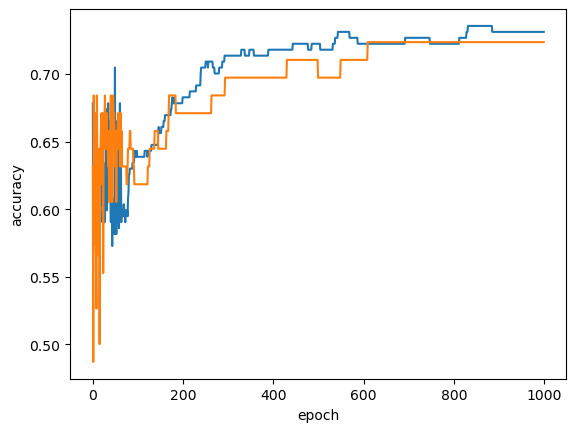

In [27]:
# 최적의 에포크 값을 찾습니다.
sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

for _ in range(0,1000):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [28]:
max(test_score)

0.7236842105263158

In [29]:
# 최적의 에포크 값은 609입니다.
test_score.index(max(test_score))

609

In [30]:
sc = SGDClassifier(loss='log_loss', max_iter=609, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7400881057268722
0.7631578947368421


In [39]:
# 2일차 Boston 데이터
Boston = pd.read_csv("C:\\Users\\user\\Desktop\\빅데이터 8기 김영규\\ML_DL\\ML_week1\\Day2\\boston.csv")
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [40]:
boston_input = Boston.drop(columns=['CHAS','RAD','MEDV']).to_numpy()
boston_target = Boston['MEDV'].to_numpy()

In [41]:
train_input, test_input, train_target, test_target = train_test_split(boston_input, 
                                                                      boston_target,
                                                                      random_state=27)

In [43]:
# 중회귀
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.7250703954207112
0.7092815659248166


In [45]:
# 결정계수가 너무 낮아, 과소적합 문제가 있음을 확인해 Poly를 사용

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9007948669774817
0.8281260757895454


In [48]:
# 데이터 정규화
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

lr = LinearRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9007948669774818
0.8281260758092466


In [49]:
# 과적합을 확인했습니다.
# squared_loss 사용
from sklearn.linear_model import SGDRegressor

sc = SGDRegressor(loss='squared_error',max_iter=10 ,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7979431745665363
0.7805206293544821


c:\ProgramData\anaconda3\envs\ML\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1616: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [50]:
# 추가적인 학습을 수행합니다.
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8007118428513482
0.7796798491795334


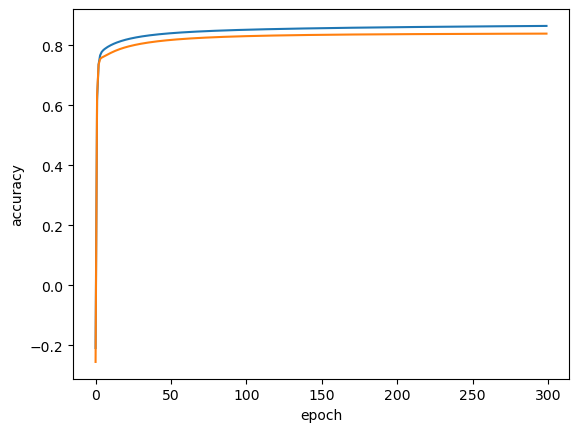

In [51]:
#최적의 에포크값을 찾아냅니다.
# test 그래프를 보고 train과의 차이를 확인합니다.

sc =  SGDRegressor(loss='squared_error', random_state=42)

train_score = []
test_score = []

for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [52]:
max(test_score)

0.8388942149195997

In [53]:
# 최적의 에포크 값은 299입니다.
test_score.index(max(test_score))

299

In [64]:
sc = SGDRegressor(loss='squared_error',max_iter=299,tol=None ,random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8651961583487023
0.8474505487867785
